In [1]:
from modeller import *

In [ ]:
from modeller import *
# Get the sequence of the 1qg8 PDB file, and write to an alignment file
code = '1qg8'

e = Environ()
m = Model(e, file=code)
aln = Alignment(e)
aln.append_model(m, align_codes=code)
aln.write(file=code+'.seq')

In [9]:
import imageio
import numpy as np
filename = '12_tir stand.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
length = 600
timing = vid.count_frames()
multiplicator = int(timing/length)
nums = range(0, length)
images = []
for i in nums:
    image = vid.get_data(i*multiplicator)
    images.append(np.array(image)[:,:,1])

for i, x in enumerate(images):
    im = Image.fromarray(x)
    im.save(f"12_tir stand/10fps/{i}.tif")

In [2]:
len(images)

600

In [5]:
from PIL import Image

for i, x in enumerate(images):
    im = Image.fromarray(x)
    im.save(f"11_Ca free/20fps/{i}.tif")

In [4]:
length = 60
timing = vid.count_frames()
multiplicator = int(timing/length)
nums = range(0, multiplicator*length)

print(timing, multiplicator, multiplicator*length)

7305 121 7260


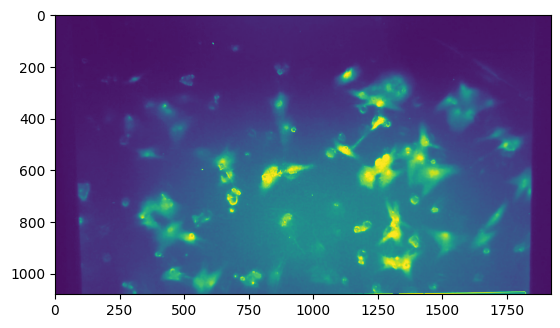

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [6]:
from clusters_tools import *

import glob
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

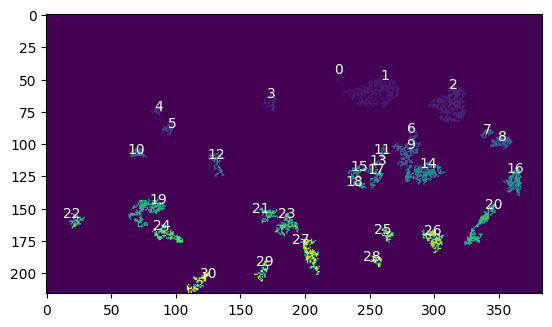

In [21]:
## в папке должны содеражаться только изображения с флуоресцентного микроскопа с динамическим процессом

# вставьте время добавки (start) и время следующей добавки (end) 
thre = 0.995   # можно поиграться с эти значением, чтобы лучше разграничить клетки
start = 18    # время добавки (кадр)
end = 22      # время следующей добавки (кадр) или + 1.5 минуты для FluO-4
sums = calculate_changes_downsample(start = start, end = end, im_list = images, thre = thre) 
complexes = calculate_complexes(sums)

## визуализация изображения
complex_img = complex_to_img(sums, complexes)
c_extended = complexes_extended(complex_img)

plt.imshow(complex_img)

for i, ix in enumerate(complexes):
    label = f'{i}'
    text_x = ix[0][0]
    text_y = ix[0][1]
    plt.text(text_y, text_x, label, color='White', ha='center', va='center')

plt.show()

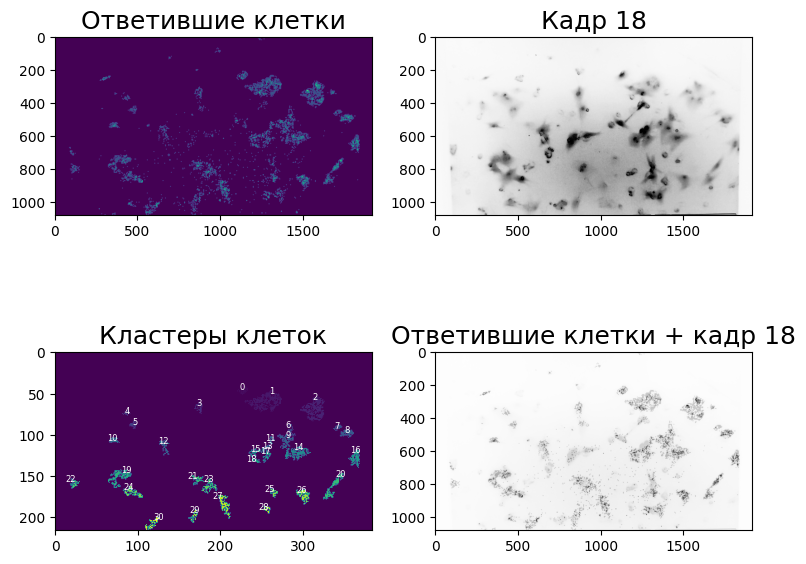

In [22]:
## визуализация клеток
im_list = images
sums_extended = complexes_extended(sums)
x, y = sums_extended.shape
f, axarr = plt.subplots(2,2, figsize=(9, 7.5))
title_fontsize = 18

axarr[0,0].imshow(sums_extended, vmin = 0, vmax = 1)
axarr[0,0].set_title('Ответившие клетки', fontsize=title_fontsize) 

axarr[0,1].imshow(im_list[15-1]/255, vmin = 0, vmax = 1, cmap = 'Greys')
axarr[0,1].set_title(f'Кадр {start}', fontsize=title_fontsize) 

axarr[1,0].imshow(complex_img*2)
axarr[1,0].set_title('Кластеры клеток', fontsize=title_fontsize) 

for i, ix in enumerate(complexes):
    label = f'{i}'
    text_x = ix[0][0]
    text_y = ix[0][1]
    axarr[1,0].text(text_y, text_x, label, color='White', ha='center', va='center', fontsize = 6)
    
axarr[1,1].imshow(sums_extended+(im_list[15-1][:x,:y]/(255*3.5)), vmin = 0, vmax = 1, cmap='Greys')
axarr[1,1].set_title(f'Ответившие клетки + кадр {start}', fontsize=title_fontsize) 

plt.show()

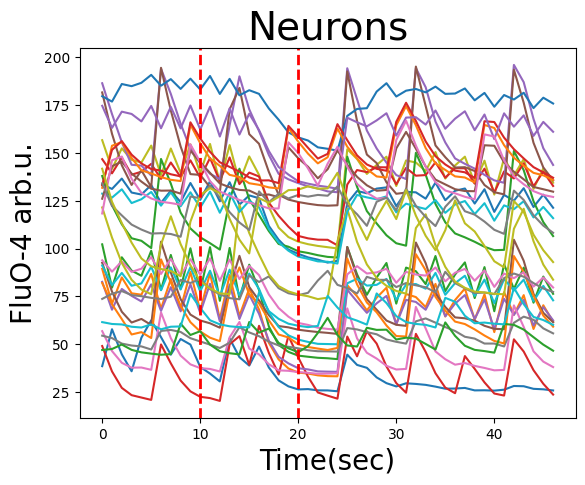

In [20]:
## Подсчет изменения свечения в клетках
lines = calculate_lines(c_extended, im_list)
time_seconds = [i*1 for i in range(len(lines[0]))]
for i in lines:
    plt.plot(time_seconds,i)

plt.title('Neurons', fontsize = 28)
plt.ylabel('FluO-4 arb.u.', fontsize = 20)
plt.xlabel('Time(sec)', fontsize = 20)
plt. axvline(x=start*1, color='r', linestyle='--', linewidth=2)
plt. axvline(x=end*1, color='r', linestyle='--', linewidth=2)
plt.show()

In [6]:
imageio.imsave('1.jpg', image)

In [11]:
meta_data = vid.get_meta_data()
num_frames = meta_data['nframes']
num_frames

inf

In [12]:
vid.count_frames()

2854

In [16]:
import numpy as np
(images[0])[:,:,1].shape

(1080, 1920)

In [97]:
changes = np.ones(images[0].shape)
for x in range(1, 285):
    x = (np.log(np.sqrt((images[0]-images[1])**2)))
    x[x<=0] = 0
    changes *= 1 - x * 1/285

C:\Users\user\AppData\Local\Temp\ipykernel_14736\1398138353.py:3: RuntimeWarning: divide by zero encountered in log
  x = (np.log(np.sqrt((images[0]-images[1])**2)))


In [54]:
changes = np.array(changes)

changes.shape

(284, 1080, 1920)

In [56]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [55]:
np.mean(changes, axis=-1).shape

(284, 1080)

In [104]:
inverted = 1 - changes
inverted[inverted<=0.7] = 0
np.min(inverted)

0.0

In [1]:
import glob
from PIL import Image
import numpy as np

im_list = []
for i in glob.glob('5-pep-nmda/*'):
    #print(i)
    image_pil = Image.open(i)
    im_list.append(np.asarray(image_pil)[:,:,1]*10)

In [3]:
im_list[0].shape

(1024, 1360)

In [137]:
changes = np.zeros(im_list[0].shape)

for x in range(1, len(im_list)):
    x = 1/(1+np.exp(-(np.sqrt((im_list[0]-im_list[1])**2))))
    x[x<=0] = 0
    changes += x

In [161]:
#add to list

changes = []
start = 15
end = 25
for i in range(start, end):
    c = 1/(1+np.exp(-(np.sqrt((im_list[i]-im_list[i+1])**2))))
    c[c<=np.mean(c)]=0
    kernel = 5
    ct = np.array([[np.mean(c[x*kernel:(x+1)*kernel,y*kernel:(y+1)*kernel]) for y in range(int(int(c.shape[1])/kernel))] for x in range(int(int(c.shape[0])/kernel))])
    #kernel2 = 5
    #ctt = np.array([[np.max(ct[x*kernel2:(x+1)*kernel2,y*kernel2:(y+1)*kernel2]) for y in range(int(int(ct.shape[1])/kernel2))] for x in range(int(int(ct.shape[0])/kernel2))])
    ct[ct<=0.8]=0
    changes.append(ct)

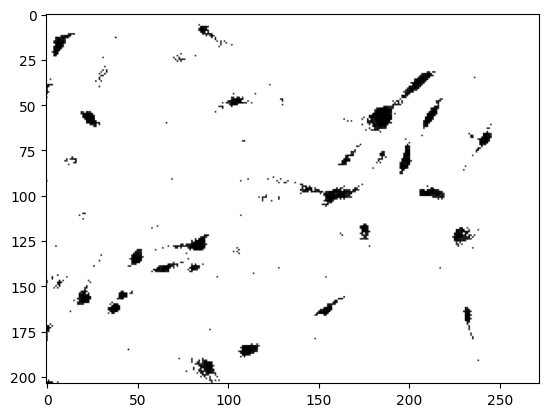

In [162]:
plt.imshow(changes[1], cmap='Greys', vmin=0, vmax=1)

In [163]:
sums = np.zeros(changes[0].shape)
for i in changes:
    sums+=i

sums = (sums-np.min(sums))/np.max(sums)

In [70]:
np.max(sums)

1.0

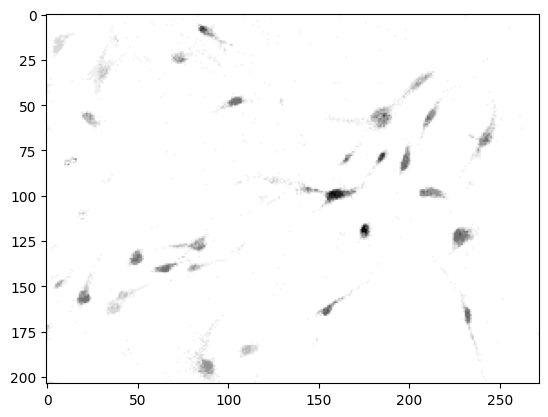

In [164]:
plt.imshow(sums, cmap='Greys')


(1024, 1360)


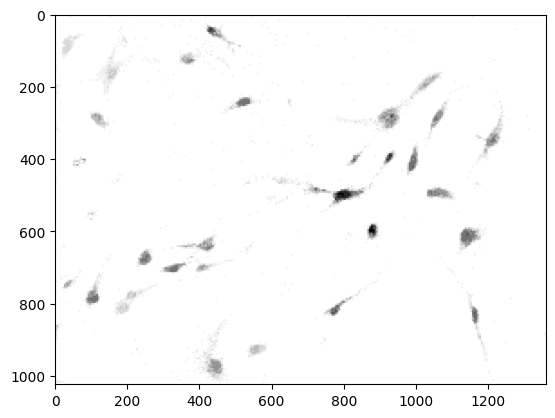

In [166]:
cc = np.zeros(im_list[0].shape)
print(cc.shape)
tt = np.argwhere(sums!=0)
kernel2 = 5
for x in tt:
    cc[x[0]*kernel2:(x[0]+1)*kernel2, x[1]*kernel2:(x[1]+1)*kernel2]=sums[x[0],x[1]]
'''
kernel = 5
c0 = np.zeros(im_list[0].shape)
t0 = np.argwhere(sums>=np.mean(sums))
for x in t0:
    c0[x[0]*kernel:(x[0]+1)*kernel, x[1]*kernel:(x[1]+1)*kernel]=sums[x[0],x[1]]
'''
plt.imshow(cc, cmap='Greys', vmin=0, vmax=1)

In [ ]:
import scipy.cluster.hierarchy as hcluster

tz = np.argwhere(sums!=0)
thresh = 10
clusters = hcluster.fclusterdata(tz, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(tz), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

In [ ]:
plt.scatter(*np.transpose(tz))

In [46]:
from math import dist
dist(no_zeros[0],no_zeros[1])

15.0

In [72]:
no_zeros.shape

(3129, 2)

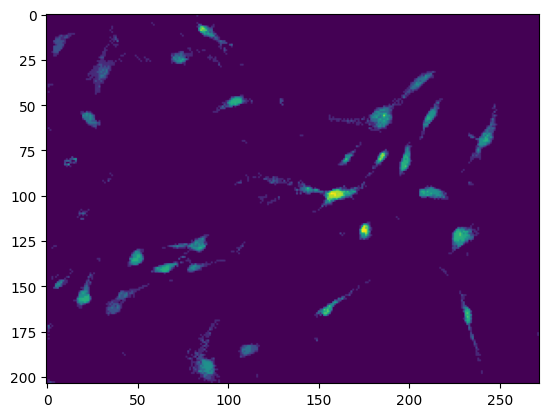

In [92]:
sums_ones = sums
no_zeros = np.argwhere(sums_ones!=0)

no_zeros_array = np.zeros(sums_ones.shape)
for i in no_zeros:
    try:
        if len(np.argwhere(sums_ones[i[0]-1:i[0]+2,i[1]-1:i[1]+2]!=0))>1:
            no_zeros_array[i[0], i[1]]=sums_ones[i[0],i[1]]
    except:
        continue

plt.imshow(no_zeros_array, vmin=0, vmax=1)

In [119]:
def complex_grow(sums_ones, non_zeros_common, growing_array, working_array):
    for x in growing_array:
        for i in np.argwhere(sums_ones[x[0]-1:x[0]+2,x[1]-1:x[1]+2]!=0):
            if [i[0]-1+x[0], i[1]-1+x[1]] not in working_array:
                working_array.append([i[0]-1+x[0], i[1]-1+x[1]])
                growing_array.append([i[0]-1+x[0], i[1]-1+x[1]])
        if x in growing_array:
            growing_array.remove(x)
        if x in non_zeros_common:
            non_zeros_common.remove(x)
    while len(growing_array)>0:
        complex_grow(sums_ones, non_zeros_common, growing_array, working_array)

In [121]:
sums_ones = sums
no_zeros = np.argwhere(sums_ones!=0)
no_zeros = [[x[0],x[1]] for x in no_zeros]

complexes = []
for x in no_zeros:
    growing_array = []
    working_array = []
    for i in np.argwhere(sums_ones[x[0]-1:x[0]+2,x[1]-1:x[1]+2]!=0):
        if [i[0]-1+x[0], i[1]-1+x[1]] not in working_array:
            working_array.append([i[0]-1+x[0], i[1]-1+x[1]])
            growing_array.append([i[0]-1+x[0], i[1]-1+x[1]])
        if x in no_zeros:
            no_zeros.remove(x)
    complex_grow(sums_ones, no_zeros, growing_array, working_array)
    complexes.append(working_array)

In [138]:
len(complexes)

big_complexes = [x for x in complexes if len(x)>=25]
len(big_complexes)

29

In [135]:
sums_ones.shape

(204, 272)

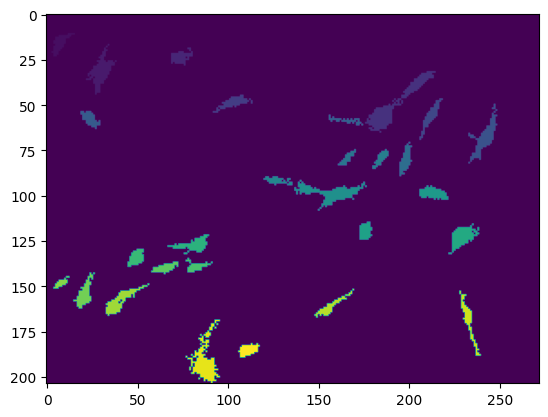

In [167]:
new_complexes = []
colorss = []
for i, z in enumerate(big_complexes):
    for x in z:
        new_complexes.append(x)
        colorss.append(i)

new_array = np.zeros(sums_ones.shape)
for i, z in enumerate(big_complexes):
    for x in z:
        new_array[x[0],x[1]]=i

plt.imshow(new_array)

In [168]:
cc_complexes_extended = np.zeros((new_array.shape[0]*5,new_array.shape[1]*5))
print(cc_complexes_extended.shape)
tt = np.argwhere(new_array!=0)
kernel2 = 5
for x in tt:
    cc_complexes_extended[x[0]*kernel2:(x[0]+1)*kernel2, x[1]*kernel2:(x[1]+1)*kernel2]=new_array[x[0],x[1]]

kernel = 5
c0 = np.zeros(im_list[0].shape)
t0 = np.argwhere(cc_complexes_extended!=0)
for x in t0:
    c0[x[0]*kernel:(x[0]+1)*kernel, x[1]*kernel:(x[1]+1)*kernel]=cc_complexes_extended[x[0],x[1]]

(1020, 1360)


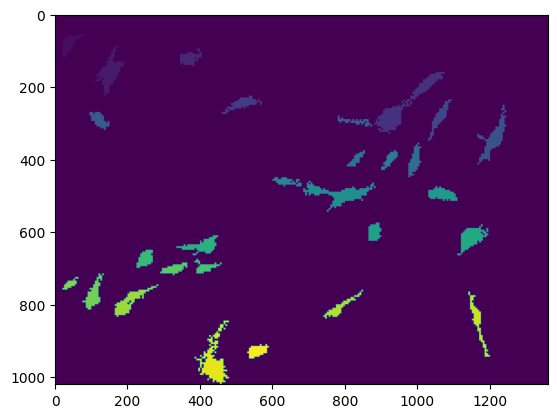

In [169]:
plt.imshow(cc_complexes_extended)

In [172]:
def all_mean_slices(slice_list, coords_list):
    line = []
    for i in slice_list:
        mean = np.mean(np.array([i[x[0],x[1]] for x in coords_list]))
        line.append(mean)
    return line

In [173]:
number_of_complexes=np.max(cc_complexes_extended)
lines = []
for x in range(int(number_of_complexes)):
    lines.append(all_mean_slices(im_list, np.argwhere(cc_complexes_extended==x+1)))


In [180]:
import pandas as pd

dat = {f'{x}':lines[x] for x in range(len(lines))}
dat = pd.DataFrame(dat)
dat.to_csv('neuro.csv')

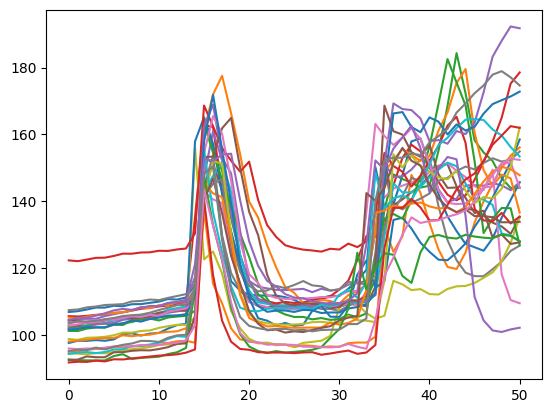

In [186]:
for i in lines:
    plt.plot(i)

0.0


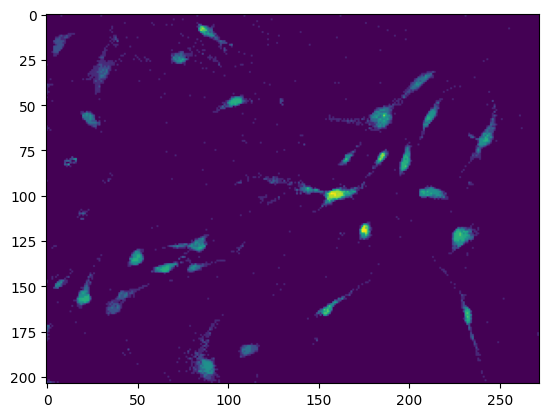

In [129]:
print(np.min(sums_ones))
plt.imshow(sums_ones, vmin=0, vmax=1)

In [76]:
len(np.argwhere(sums_ones[no_zeros[10][0]-1:no_zeros[10][0]+2,no_zeros[10][1]-1:no_zeros[10][1]+2]!=0))

1

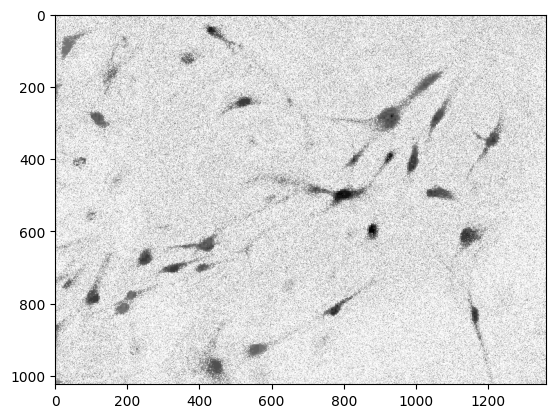

In [73]:
c0 = c0/(np.max(c0)*2)
plt.imshow(c0+(1/(1+np.exp(-(np.sqrt((im_list[17]-im_list[16])**2))))), cmap='Greys')

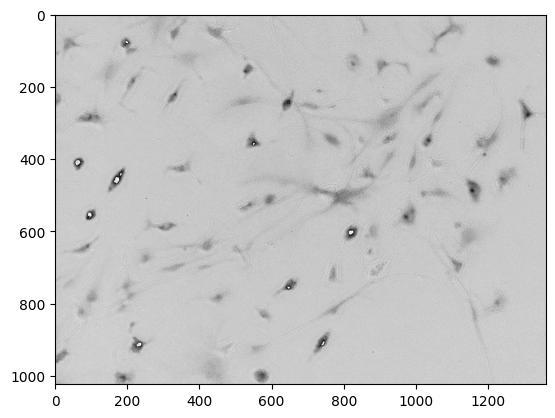

In [156]:
import matplotlib.pyplot as plt
plt.imshow(im_list[0], cmap='Greys')

1.0


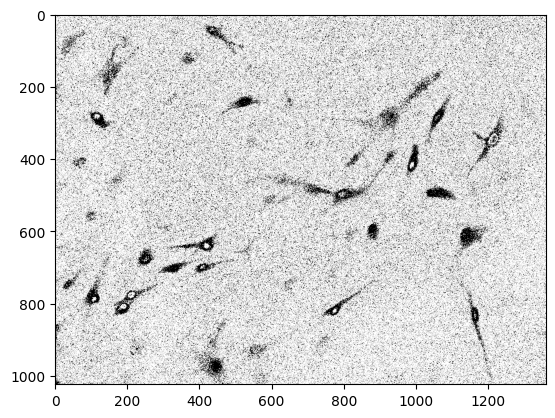

In [198]:
x = 1/(1+np.exp(-np.sqrt((im_list[16]-im_list[15])**2)))
z = 1/(1+np.exp(-np.sqrt((im_list[16]-im_list[17])**2)))
x[x<np.mean(x)]=0
z[z<np.mean(z)]=0
c = x*z
print(np.max(c))
c[c!=1.0]=0
plt.imshow(c, cmap='Greys', vmin=0, vmax=1)

In [ ]:
import torch
device = torch.cuda
ct = torch.tensor(c)
ct = ct.reshape((1,ct.shape[0], ct.shape[1])).to('cuda')
print(ct.shape)
pool = torch.nn.AvgPool2d((10,10)).to('cuda')
output = pool(ct)

In [257]:
kernel = 10
ct = np.array([[np.mean(c[x*kernel:(x+1)*kernel,y*kernel:(y+1)*kernel]) for y in range(int(int(c.shape[1])/kernel))] for x in range(int(int(c.shape[0])/kernel))])

In [238]:
c.shape

(1024, 1360)

0.06
1.0
0.2437


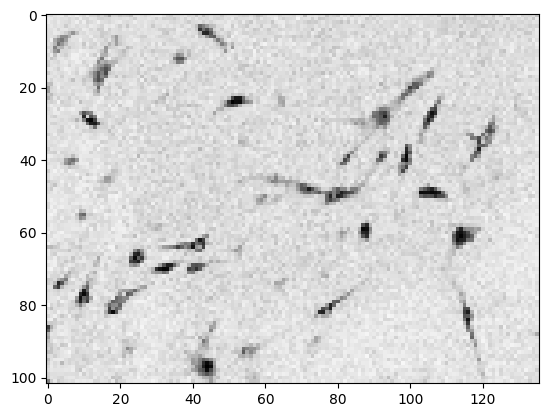

In [258]:
print(np.min(ct))
print(np.max(ct))
print(np.mean(ct))
#ct[ct<=np.mean(ct)]=0
plt.imshow(ct, cmap='Greys', vmin=0, vmax=1)

In [264]:
kernel = 4
ctt = np.array([[np.max(ct[x*kernel:(x+1)*kernel,y*kernel:(y+1)*kernel]) for y in range(int(int(ct.shape[1])/kernel))] for x in range(int(int(ct.shape[0])/kernel))])

0.0
1.0
0.02586


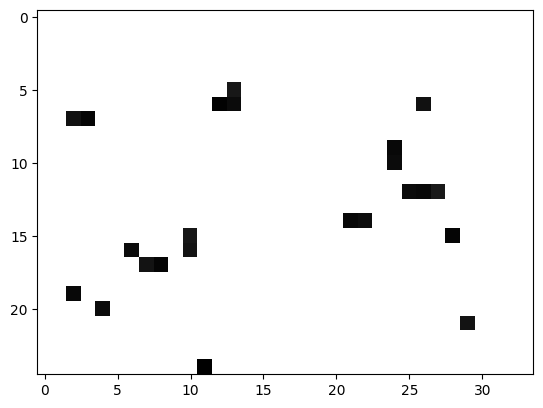

In [290]:
print(np.min(ctt))
print(np.max(ctt))
print(np.mean(ctt))
ctt[ctt<=0.8]=0
plt.imshow(ctt, cmap='Greys', vmin=0, vmax=1)

In [291]:
tt = np.argwhere(ctt>=0.9)

In [279]:
aaaa = np.zeros((4,4))
aaaa[2:4,3:4]=1
print(aaaa)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


(102, 136)


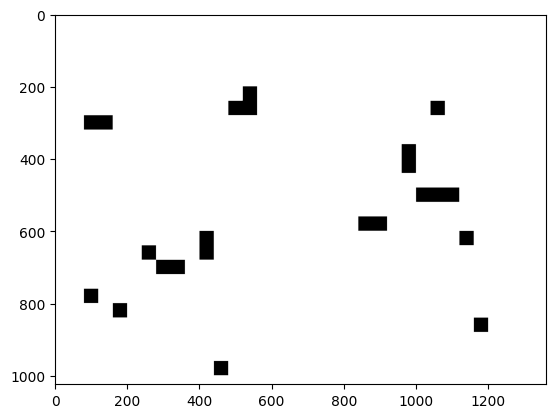

In [292]:
cc = np.zeros(ct.shape)
print(cc.shape)
for x in tt:
    cc[x[0]*4:(x[0]+1)*4, x[1]*4:(x[1]+1)*4]=1

c0 = np.zeros(c.shape)
t0 = np.argwhere(cc==1.0)
for x in t0:
    c0[x[0]*10:(x[0]+1)*10, x[1]*10:(x[1]+1)*10]=1

plt.imshow(c0, cmap='Greys', vmin=0, vmax=1)

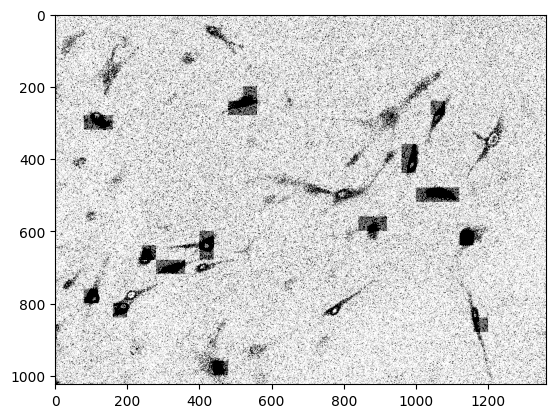

In [293]:
plt.imshow(c+c0*0.5, cmap='Greys', vmin=0, vmax=1)

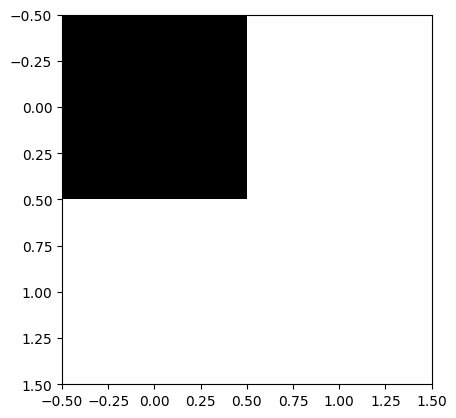

In [171]:
z = np.array([[1,0],[0,0]])
plt.imshow(z, cmap='Greys')

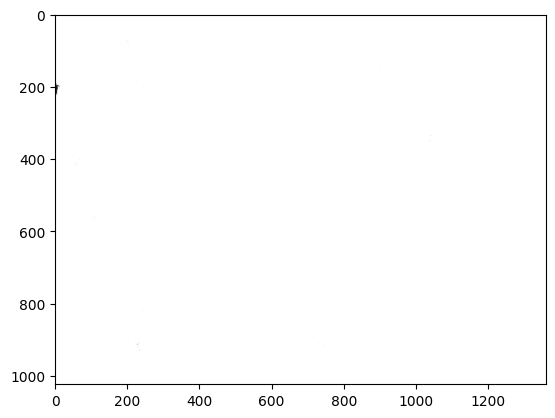

In [117]:
inverted = 1 - changes
inverted[inverted<=0.7] = 0
plt.imshow(inverted, cmap='Greys')

In [88]:
x = (np.log(np.sqrt((images[0]-images[1])**2)))
x[x<=0] = 0
np.min(x)

C:\Users\user\AppData\Local\Temp\ipykernel_14736\3459810560.py:1: RuntimeWarning: divide by zero encountered in log
  x = (np.log(np.sqrt((images[0]-images[1])**2)))


0.0

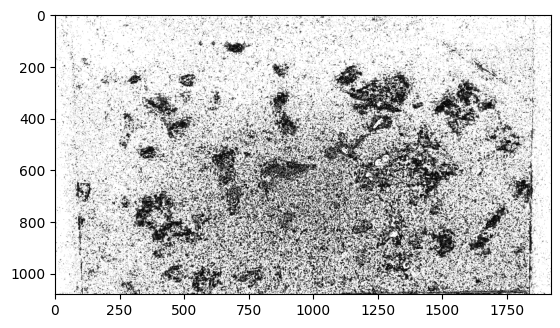

In [99]:
import matplotlib.pyplot as plt

plt.imshow(1 - changes, cmap='Greys')

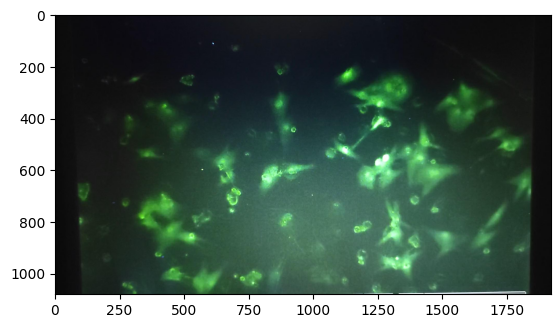

In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("cards/0.jpg")
plt.imshow(image)
plt.show()

In [70]:
import pandas as pd

df = pd.read_csv('res.csv')
print(df['n'].to_list())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


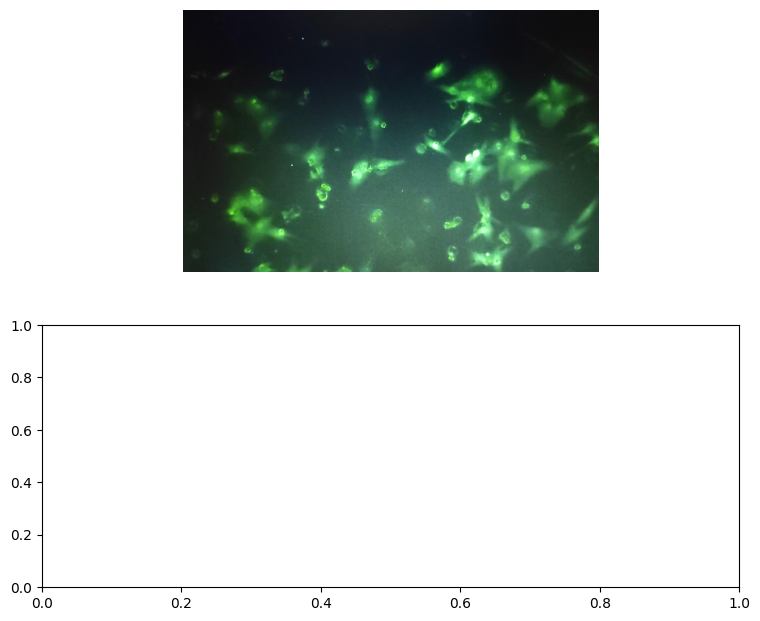

In [15]:
f, axarr = plt.subplots(2,1, figsize=(9, 7.5))

axarr[0].imshow(image[:1010,150:1750])
axarr[0].axis('off')

plt.show()

In [ ]:
import tqdm
for i in tqdm.tqdm(range(285)):
    f, axarr = plt.subplots(2,1, figsize=(6, 9))
    image = mpimg.imread(f"cards/{i}.jpg")
    axarr[0].imshow(image[:1010,150:1750])
    axarr[0].axis('off')
    axarr[1].set_ylim([20,180])
    axarr[1].set_xlim([0,50])
    axarr[1].set_ylabel('FluO-4 arb.u.', fontsize = 20)
    axarr[1].set_xlabel('Time(sec)', fontsize = 20)
    for x in range(1,6): 
        axarr[1].plot(df['n'].to_list()[:i], df[str(x)].to_list()[:i])
    plt.savefig(f'card_video/{i}.jpg')


 39%|████████████████████████████████▏                                                 | 20/51 [00:09<00:14,  2.18it/s]C:\Users\user\AppData\Local\Temp\ipykernel_12368\1791032188.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(1,2, figsize=(15, 5))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:24<00:00,  2.10it/s]


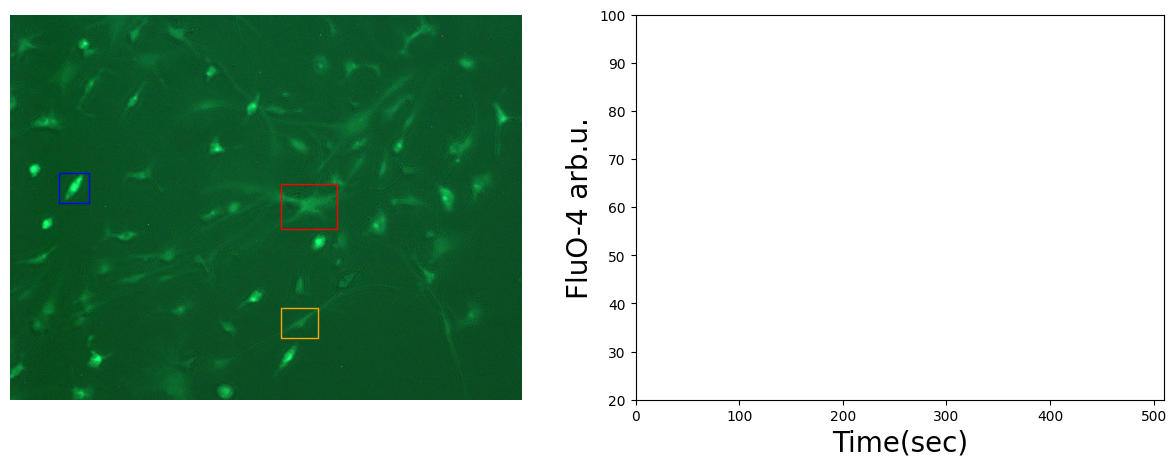

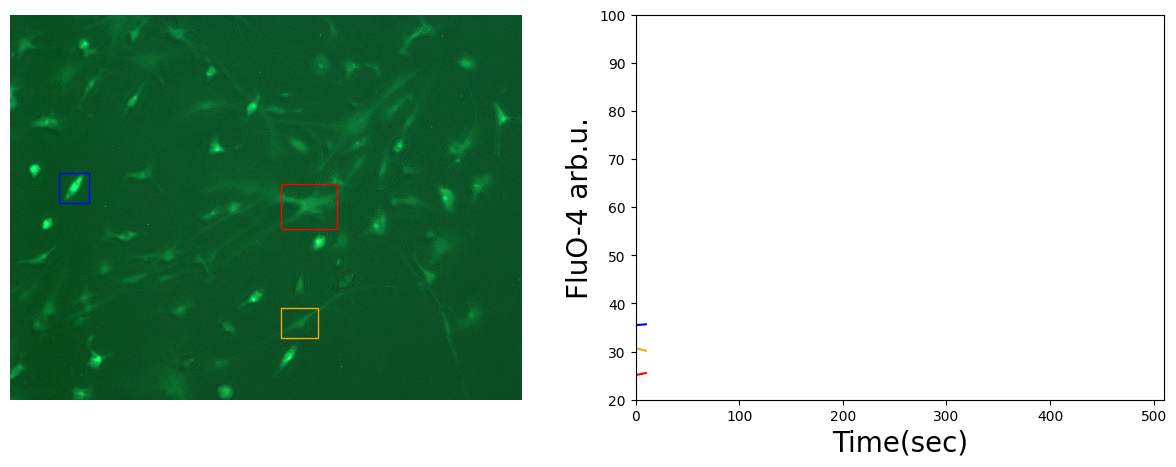

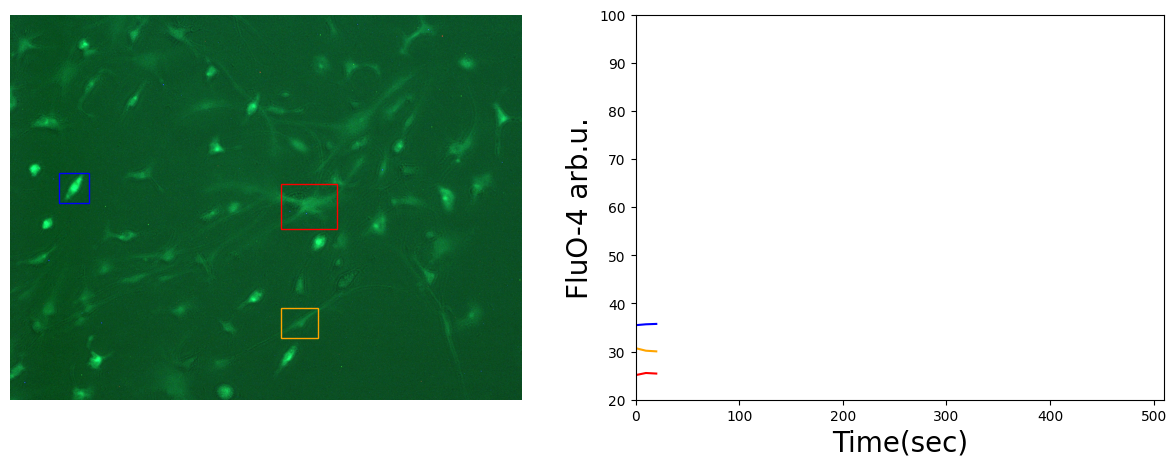

Error in callback <function flush_figures at 0x000001F55CF671F0> (for post_execute):


KeyboardInterrupt: 

In [106]:
import tqdm
import matplotlib.patches as patches
for i in tqdm.tqdm(range(1,52)):
    f, axarr = plt.subplots(1,2, figsize=(15, 5))
    for x in glob.glob(f"5-pep-nmda/5-nmda-pep_*0{i}.png"):
        image = mpimg.imread(x)
    axarr[0].imshow(image*10)
    axarr[0].axis('off')
    rect = patches.Rectangle((130, 420), 80, 80, linewidth=1, edgecolor = 'b', facecolor='none')
    axarr[0].add_patch(rect)
    rect = patches.Rectangle((720, 450), 150, 120, linewidth=1, edgecolor = 'r', facecolor='none')
    axarr[0].add_patch(rect)
    rect = patches.Rectangle((720, 780), 100, 80, linewidth=1, edgecolor = 'orange', facecolor='none')
    axarr[0].add_patch(rect)
    axarr[1].set_ylim([20,100])
    axarr[1].set_xlim([0,510])
    axarr[1].set_ylabel('FluO-4 arb.u.', fontsize = 20)
    axarr[1].set_xlabel('Time(sec)', fontsize = 20)
    
    axarr[1].plot([(z-1)*10 for z in df['n'].to_list()[:i]], df[str(1)].to_list()[:i], c = 'b')
    axarr[1].plot([(z-1)*10 for z in df['n'].to_list()[:i]], df[str(2)].to_list()[:i], c = 'r')
    axarr[1].plot([(z-1)*10 for z in df['n'].to_list()[:i]], df[str(4)].to_list()[:i], c = 'orange')
    if i>13:
        axarr[1].axvline(135, color = 'black', label = 'axvline - full height')
        axarr[1].text(140, 90, color = 'black', s = 'AMPA_P \n3µM', fontsize = 15)
    if i>31:
        axarr[1].axvline(315, color = 'black', label = 'axvline - full height')
        axarr[1].text(320, 90, color = 'black', s = 'Ferrutinin \n20µM', fontsize = 15)
    plt.savefig(f'card_video/{i}.jpg')


In [6]:
from PIL import Image
im = Image.open('card_video/1.jpg')
#im = Image.new('RGB', (),(0, 0, 0))

im_list = []
for i in range(1, 51):
    i = f'card_video/{i+1}.jpg'
    #print(i)
    image_pil = Image.open(i)
    im_list.append(image_pil)

im.save('5-pep-nmda.gif', save_all=True, append_images=im_list)